# Assignment 3 

#### Importing Necessary Libraries


In [2]:
%autosave 120
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

Autosaving every 120 seconds


#### Importing Data Into Dataframes

In [15]:
factors_data = pd.read_csv("Risk_Factors.csv")
market_data = pd.read_csv("Market_Portfolio.csv")
industry_data  = pd.read_csv("Industry_Portfolios.csv")
market_data["Market"]

0      2.22
1      1.46
2     -1.23
3     -1.75
4      1.23
       ... 
115   -2.69
116    3.76
117    4.17
118    3.12
119    2.81
Name: Market, Length: 120, dtype: float64

#### Checking For Null Values and Datatypes Within The Columns

In [4]:
print(industry_data.isnull().sum(),market_data.isnull().sum(),factors_data.isnull().sum())

Date     0
NoDur    0
Durbl    0
Manuf    0
Enrgy    0
HiTec    0
Telcm    0
Shops    0
Hlth     0
Utils    0
Other    0
dtype: int64 Date      0
Market    0
dtype: int64 Date     0
Rf       0
Rm-Rf    0
SMB      0
HML      0
dtype: int64


#### Checking For Datatypes Within The Columns

In [5]:
print(industry_data.dtypes, market_data.dtypes, factors_data.dtypes)

Date       int64
NoDur    float64
Durbl    float64
Manuf    float64
Enrgy    float64
HiTec    float64
Telcm    float64
Shops    float64
Hlth     float64
Utils    float64
Other    float64
dtype: object Date        int64
Market    float64
dtype: object Date       int64
Rf       float64
Rm-Rf    float64
SMB      float64
HML      float64
dtype: object


#### Changing Date Column To Datetime Format

In [6]:
industry_data["Date"] = pd.to_datetime(industry_data["Date"], format = "%Y%m")
market_data["Date"] = pd.to_datetime(market_data["Date"], format = "%Y%m")
factors_data["Date"] = pd.to_datetime(factors_data["Date"], format = "%Y%m")

#### Checking Lengths Of Dataframes

In [7]:
len(industry_data), len(market_data), len(factors_data)

(120, 120, 120)

#### Combining All Dataframes

In [8]:
combined = pd.merge((pd.merge(industry_data,market_data, on = "Date")), factors_data, on = "Date")

In [9]:
combined.head()

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market,Rf,Rm-Rf,SMB,HML
0,2004-01-01,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22,0.07,2.15,2.67,1.55
1,2004-02-01,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46,0.06,1.40,-1.17,0.45
2,2004-03-01,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23,0.09,-1.32,1.84,0.07
3,2004-04-01,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75,0.08,-1.83,-2.59,-1.67
4,2004-05-01,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23,0.06,1.17,-0.10,-0.33


---
# Part A
---

#### Sharpe Ratio

In [17]:
new_list = []
i = 1
while i < 11:
    numerator = np.mean(combined.iloc[:, i]- market_data["Market"])
    denominator = np.std(combined.iloc[:,i] - market_data["Market"])
    sharpe = numerator/denominator
    new_list.append(sharpe)
    i +=1

    

[0.06662857051397585,
 -0.0028703347107836776,
 0.15477662348065166,
 0.11049509780528798,
 0.008079057386054876,
 0.061874810424844294,
 0.08006892698690012,
 0.012837410063369026,
 0.0456104359018464,
 -0.12256207190633378]

In [10]:
new_list = []
i = 1
while i < 11:
    numerator = np.mean(combined.iloc[:, i]-combined["Rf"])
    denominator = np.std(combined.iloc[:,i] - combined["Rf"])
    sharpe = numerator/denominator
    new_list.append(sharpe)
    i +=1
    

In [11]:
Sharpe_Ratio = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["Sharpe Ratio"])
Sharpe_Ratio

,Sharpe Ratio
NoDur,0.232068
Durbl,0.072659
Manuf,0.167315
Enrgy,0.182470
HiTec,0.119050
Telcm,0.169773
Shops,0.192557
Hlth,0.173253
Utils,0.211832
Other,0.064964


#### Sortini Ratio

In [12]:
new_list = []
i = 1
while i < 11:
    numerator = np.mean(combined.iloc[:,i] - combined["Rf"])
    placeholder = combined.iloc[:,i] - combined["Rf"]
    denominator = placeholder[placeholder<0].std(ddof=0)
    sortini = numerator/denominator
    new_list.append(sortini)
    i +=1

In [13]:
Sortini_Ratio = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["Sortini Ratio"])
Sortini_Ratio

,Sortini Ratio
NoDur,0.296957
Durbl,0.104115
Manuf,0.201102
Enrgy,0.250320
HiTec,0.170323
Telcm,0.222328
Shops,0.264294
Hlth,0.271549
Utils,0.232547
Other,0.077476


#### Treynor Ratio

In [54]:
new_list = []
i = 1
while i < 11:
    numerator = np.mean(combined.iloc[:,i] - combined["Rf"])
    beta = (combined.iloc[:,i].cov(combined.Market))/combined["Market"].var()
    print (combined.iloc[:,i].cov(combined.Market))
    print (numerator)
    print ("--")
    print ( beta  )
    print ("--")    
    treynor = numerator/beta
    new_list.append(treynor)
    i +=1
    

12.300096232492995
0.7755833333333335
--
0.6526473559635407
--
31.069071148459372
0.6060833333333332
--
1.6485356499666461
--
22.047468501400562
0.8855833333333336
--
1.169846296414878
--
18.278244271708687
1.103916666666667
--
0.9698499564640053
--
21.352470063025194
0.6390000000000001
--
1.1329694391423117
--
16.97556324229692
0.7541666666666667
--
0.9007292509476117
--
15.576460980392165
0.7890833333333335
--
0.8264924015201599
--
12.684344383753505
0.6565833333333335
--
0.6730356956329143
--
10.14102141456583
0.7799166666666667
--
0.53808610013164
--
22.75351671568627
0.36183333333333334
--
1.2073094586151099
--


In [16]:
Treynor_Ratio = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["Treynor Ratio"])
Treynor_Ratio



,Treynor Ratio
NoDur,1.188365
Durbl,0.367650
Manuf,0.757008
Enrgy,1.138234
HiTec,0.564005
Telcm,0.837285
Shops,0.954738
Hlth,0.975555
Utils,1.449427
Other,0.299702


#### Jensen's Alpha

In [17]:
new_list = []
i = 1
while i < 11:
    part1 = np.mean(combined.iloc[:,i] - combined["Rf"])
    beta = (combined.iloc[:,i].cov(combined.Market))/combined["Market"].var()
    part2 = np.mean(combined["Rm-Rf"])
    jensen = part1 -beta*part2
    new_list.append(jensen)
    i +=1

In [18]:
Jensens_Alpha = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["Jensen's Alpha"])
Jensens_Alpha

,Jensen's Alpha
NoDur,0.370398
Durbl,-0.417383
Manuf,0.159304
Enrgy,0.501801
HiTec,-0.064385
Telcm,0.194964
Shops,0.275969
Hlth,0.238740
Utils,0.445855
Other,-0.387705


#### 3 Factor Alpha

In [19]:
new_list = []
placeholder3 = combined["Rm-Rf"]
placeholder4 = combined["SMB"]
placeholder5 = combined["HML"]
i = 1
while i< 11:
    placeholder2 = combined.iloc[:,i] - combined["Rf"]
    model = sm.formula.ols(formula = "placeholder2 ~ placeholder3+placeholder4+placeholder5", data = combined).fit()
    new_list.append(model.params[0])
    i +=1

In [20]:
three_FA = pd.DataFrame(data = new_list, index = industry_data.columns[1:], columns = ["3FA alpha"])
three_FA

,3FA alpha
NoDur,0.386704
Durbl,-0.474342
Manuf,0.153285
Enrgy,0.523007
HiTec,-0.065979
Telcm,0.200724
Shops,0.255941
Hlth,0.257472
Utils,0.474411
Other,-0.404412


In [21]:
#array1 = [Sharpe_Ratio, Sortini_Ratio, Treynor_Ratio, Jensens_Alpha, three_FA]
df1 = pd.merge(Sharpe_Ratio, Sortini_Ratio, left_index = True, right_index = True)
df2 = pd.merge(df1, Treynor_Ratio, left_index = True, right_index = True)
df3 = pd.merge(df2, Jensens_Alpha, left_index = True, right_index = True)
df_ratios = pd.merge(df3, three_FA, left_index = True, right_index = True)

In [22]:
df_ratios.reset_index(level= 0, inplace = True)
df_ratios = df_ratios.rename(columns={"index": "Industry"})
df_ratios

,Industry,Sharpe Ratio,Sortini Ratio,Treynor Ratio,Jensen's Alpha,3FA alpha
0,NoDur,0.232068,0.296957,1.188365,0.370398,0.386704
1,Durbl,0.072659,0.104115,0.367650,-0.417383,-0.474342
2,Manuf,0.167315,0.201102,0.757008,0.159304,0.153285
3,Enrgy,0.182470,0.250320,1.138234,0.501801,0.523007
4,HiTec,0.119050,0.170323,0.564005,-0.064385,-0.065979
5,Telcm,0.169773,0.222328,0.837285,0.194964,0.200724
6,Shops,0.192557,0.264294,0.954738,0.275969,0.255941
7,Hlth,0.173253,0.271549,0.975555,0.238740,0.257472
8,Utils,0.211832,0.232547,1.449427,0.445855,0.474411
9,Other,0.064964,0.077476,0.299702,-0.387705,-0.404412


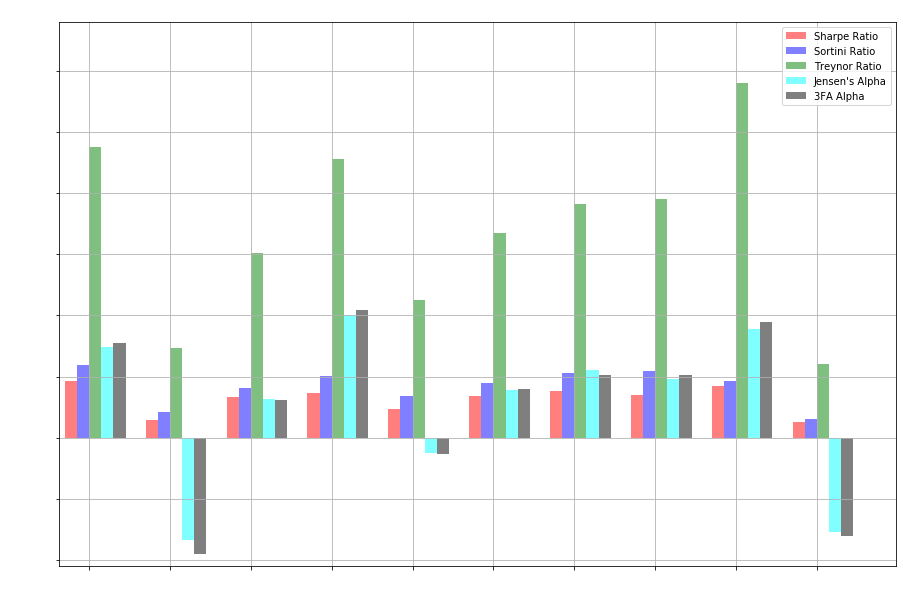

In [23]:
pos = list(range(len(df_ratios["Industry"])))
width = 0.15

fig, ax = plt.subplots(figsize = (15,10))
plt.bar(pos, df_ratios["Sharpe Ratio"], width, alpha = 0.5, color = "red", label = "Sharpe Ratio")
plt.bar([p+width for p in pos], df_ratios["Sortini Ratio"], width, alpha = 0.5, color = "blue", label = "Sortini Ratio")
plt.bar([p+width*2 for p in pos], df_ratios["Treynor Ratio"], width, alpha = 0.5, color = "green", label = "Treynor Ratio")
plt.bar([p+width*3 for p in pos], df_ratios["Jensen's Alpha"], width, alpha = 0.5, color = "cyan", label = "Jensen's Alpha")
plt.bar([p+width*4 for p in pos], df_ratios["3FA alpha"], width, alpha = 0.5, color = "black", label = "3FA Alpha")

ax.set_ylabel('Number', color = "white")

# Set the chart's title
ax.set_title('Bar Plot Of Ratios', color = "white")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 *width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_ratios['Industry'], color = "white")
plt.yticks(color = "white")
# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*8)
plt.ylim(min(df_ratios["3FA alpha"]-0.05),max(df_ratios['Treynor Ratio'])+0.25)
# Adding the legend and showing the plot
plt.legend()
plt.grid()
plt.show()





#### Economic Signficance

----
# Part B
----

#### Finding Mean Returns From Industry Dataframe

In [24]:
mean_returns = industry_data.mean()
mean_returns_array = np.array(mean_returns)
mean_returns_array.transpose()

array([0.90283333, 0.73333333, 1.01283333, 1.23116667, 0.76625   ,
       0.88141667, 0.91633333, 0.78383333, 0.90716667, 0.48908333])

#### Finding Covariance Matrix From Industry Dataframe

In [25]:
cov_matrix = industry_data.cov()
cov_matrix

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


#### Creating Loop To Get 10 Random Numbers between 1 And 0 For 10,000 Times And Append To A List

In [26]:
x = range(0,10000)

weights = []

for i in x:
    a = np.random.uniform(1,0,10)
    a = a/sum(a)
    weights.append(a)


#### Convert List To An Array

In [27]:
weights = np.array(weights)

In [28]:
weights

array([[0.10543691, 0.05778506, 0.03305291, ..., 0.03094269, 0.21186617,
        0.15495232],
       [0.07970478, 0.04597444, 0.09208103, ..., 0.07598458, 0.11113008,
        0.15107723],
       [0.02603937, 0.08391684, 0.05715359, ..., 0.16651979, 0.02250444,
        0.23879708],
       ...,
       [0.07051501, 0.11213893, 0.09962799, ..., 0.09063708, 0.02738066,
        0.12196158],
       [0.04343532, 0.04223747, 0.2006884 , ..., 0.17336883, 0.11381891,
        0.06212613],
       [0.14997321, 0.18170828, 0.11942889, ..., 0.04937307, 0.00671794,
        0.10280474]])

#### Create A Loop To Calculate Expected Return For Each Industry Using Formula In Notes

In [29]:
expected_return_list = []
for i in range(10000):
    expected_return = weights[i].dot(mean_returns_array.transpose())
    #mean_returns_array.transpose().dot(list1[i])
    expected_return_list.append(expected_return)
    
expected_return_array = np.array(expected_return_list)

In [30]:
expected_return_list

[0.8888245198611907,
 0.8674215198723827,
 0.8298724410338061,
 0.9250765305257929,
 0.8282470494186179,
 0.8328924284110087,
 0.8934612275195345,
 0.8842878701157733,
 0.8879820927187829,
 0.8961853112963377,
 0.8565899312986616,
 0.8627865431599444,
 0.9324885983630185,
 0.8994803796051811,
 0.8571423816225248,
 0.8498083441978828,
 0.8503001693696979,
 0.8896346984319329,
 0.8017683725212879,
 0.8116972204144055,
 0.8437839349714363,
 0.8561311798885471,
 0.8496431536450533,
 0.8625425326597269,
 0.9095721983502298,
 0.8051028504908111,
 0.8532362003959969,
 0.827936616132045,
 0.9000005335551282,
 0.8589348282205285,
 0.8448756581533343,
 0.8718185491834067,
 0.8717221496375616,
 0.8740318417534975,
 0.8463329021637704,
 0.8177048789665373,
 0.8837584010096257,
 0.8863870150956612,
 0.8607146120058182,
 0.9492538149947626,
 0.88587693621496,
 0.8823617365279555,
 0.8577721471021218,
 0.8584236883356546,
 0.8412013835174954,
 0.9383949750191971,
 0.8538723396591181,
 0.8752576422834

#### Create A Loop To Calculate Variance For Each Industry Using Formula In Notes

In [31]:
len(weights)

10000

In [32]:
variance_list = []
for i in range(len(weights)):
    variance_value = weights[i].transpose()@(cov_matrix)@(weights[i])
    variance_list.append(variance_value)

variance_list

[16.227519505689283,
 17.77278149771517,
 20.88544630907772,
 17.532279669792906,
 20.41920181365008,
 16.328196641730404,
 16.178862702224173,
 18.75724090986125,
 21.34631727516522,
 17.070355067250823,
 23.969379825984724,
 18.896770836952854,
 14.650554943572967,
 22.770432825831804,
 16.254301619744123,
 16.34494989008581,
 20.436607391151796,
 16.42846467698466,
 21.832498803968072,
 22.71873672512931,
 14.480814896686416,
 16.578711049251822,
 15.243515963323375,
 20.241492044508107,
 16.579885245717957,
 19.338673343403958,
 18.761830048052488,
 18.452359260162407,
 18.777910270970924,
 16.028528457279172,
 17.92582418913255,
 18.665336719277636,
 17.025836681068036,
 16.220341974564477,
 22.925396001583643,
 17.86774301074677,
 17.41922508644144,
 18.77843318792985,
 18.012802582272244,
 21.59834997189188,
 21.500625849909913,
 19.765585798643137,
 16.405069778717596,
 18.310093526336768,
 17.729130011401914,
 21.07807325752826,
 18.63651411176467,
 18.224840181767323,
 19.466

#### Convert List Into Array And Find Standard Deviation

In [33]:
variance_array = np.array(variance_list)
std_array = (variance_array)**0.5
variance_array = variance_array.reshape(10000,1)
std_array = std_array.reshape(10000,1)

In [34]:
variance_array.shape, std_array.shape

((10000, 1), (10000, 1))

#### Plot Scatter Plot Of Data

Text(0.5, 1.0, 'Standard Deviation Of Returns Versus Expected Returns')

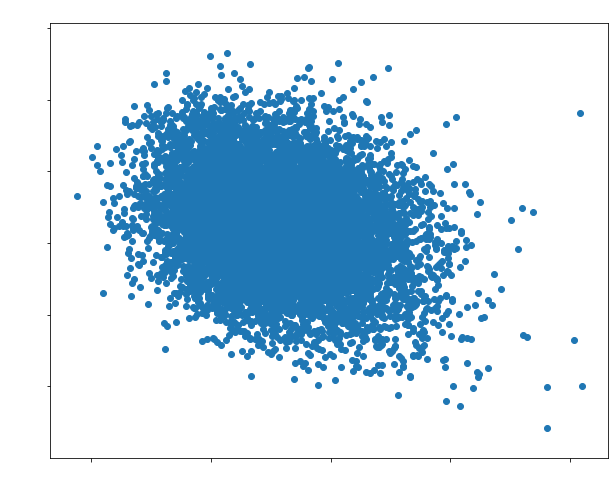

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(std_array, expected_return_array)
plt.xlabel("Standard Deviation Of Returns", color = "white")
plt.ylabel("Expected Returns", color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.title("Standard Deviation Of Returns Versus Expected Returns", color = "white")

In [36]:
a = np.random.uniform(1,0,10)
a = 1/a
a

array([ 1.0025505 ,  1.22303513,  2.45913393,  1.31997006,  1.03713637,
       56.92531945,  4.00036187,  1.19670347,  1.06298735,  2.45522661])

In [37]:
x = range(0,10000)

weights = []

for i in x:
    a = np.random.uniform(1,0,10)
    a = 1/a
    a = a/sum(a) 
    weights.append(a)
    
weights = np.array(weights)


In [38]:
expected_return_list = []
for i in range(10000):
    expected_return = weights[i].dot(mean_returns_array.transpose())
    #mean_returns_array.transpose().dot(list1[i])
    expected_return_list.append(expected_return)
    
expected_return_array = np.array(expected_return_list)

In [39]:
variance_list = []
for i in range(len(weights)):
    variance_value = weights[i].transpose()@(cov_matrix)@(weights[i])
    variance_list.append(variance_value)

variance_list

[17.998773899658595,
 33.899652580250496,
 23.452155522316307,
 15.376331275065779,
 26.333971114622372,
 27.129189704169445,
 20.0269611401201,
 17.32177114236965,
 16.855020940341234,
 25.17902007879513,
 15.5309281675493,
 19.732224957596166,
 19.616361794016832,
 61.4276276471918,
 19.493081392830895,
 16.503835733322674,
 20.72528894126522,
 18.29902070701514,
 36.36448658607003,
 18.279617207260603,
 15.108925587366086,
 17.873390309029478,
 17.78954228930475,
 18.977557021009527,
 31.45237672168551,
 16.791583129684174,
 18.074833388395806,
 15.345146281058675,
 16.86311457803579,
 17.469056743295628,
 58.95853759246951,
 26.415317116002022,
 18.5378876927896,
 12.534695148889774,
 18.18529755143629,
 14.04972797571064,
 20.478824755168702,
 19.403939163204512,
 13.514307940290529,
 15.484735077163577,
 15.660094811088403,
 12.91030516319357,
 14.1732897502184,
 14.802135347528807,
 20.690350142286064,
 15.643728284634772,
 58.334346867775,
 20.637244459157046,
 16.4600680310735

In [40]:
variance_array = np.array(variance_list)
std_array = (variance_array)**0.5
variance_array = variance_array.reshape(10000,1)
std_array = std_array.reshape(10000,1)

Text(0.5, 1.0, 'Standard Deviation Of Returns Versus Expected Returns')

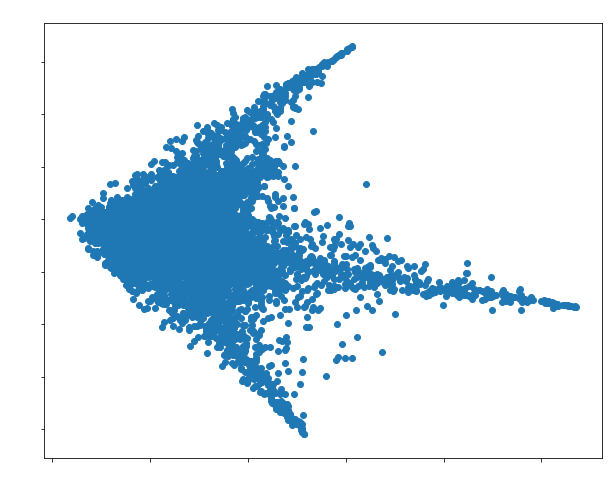

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(std_array, expected_return_array)
plt.xlabel("Standard Deviation Of Returns", color = "white")
plt.ylabel("Expected Returns", color = "white")
#plt.xlim(0, 10000)
#plt.ylim()
plt.xticks(color = "white")
plt.yticks(color = "white")
plt.title("Standard Deviation Of Returns Versus Expected Returns", color = "white")

In [64]:
placeholder2

0      2.81
1      2.10
2     -0.72
3     -3.84
4      1.80
       ... 
115   -3.66
116    3.83
117    3.87
118    4.74
119    3.11
Length: 120, dtype: float64